In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### Observations
* There are 20640 rows in the dataset. Which means that it is fairly small data sample by machine learning standards.

* There are 207 missing values in the total_bedrooms attribute, we will look into this later.

* All attributes are numerical, except ocean_proximity

In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


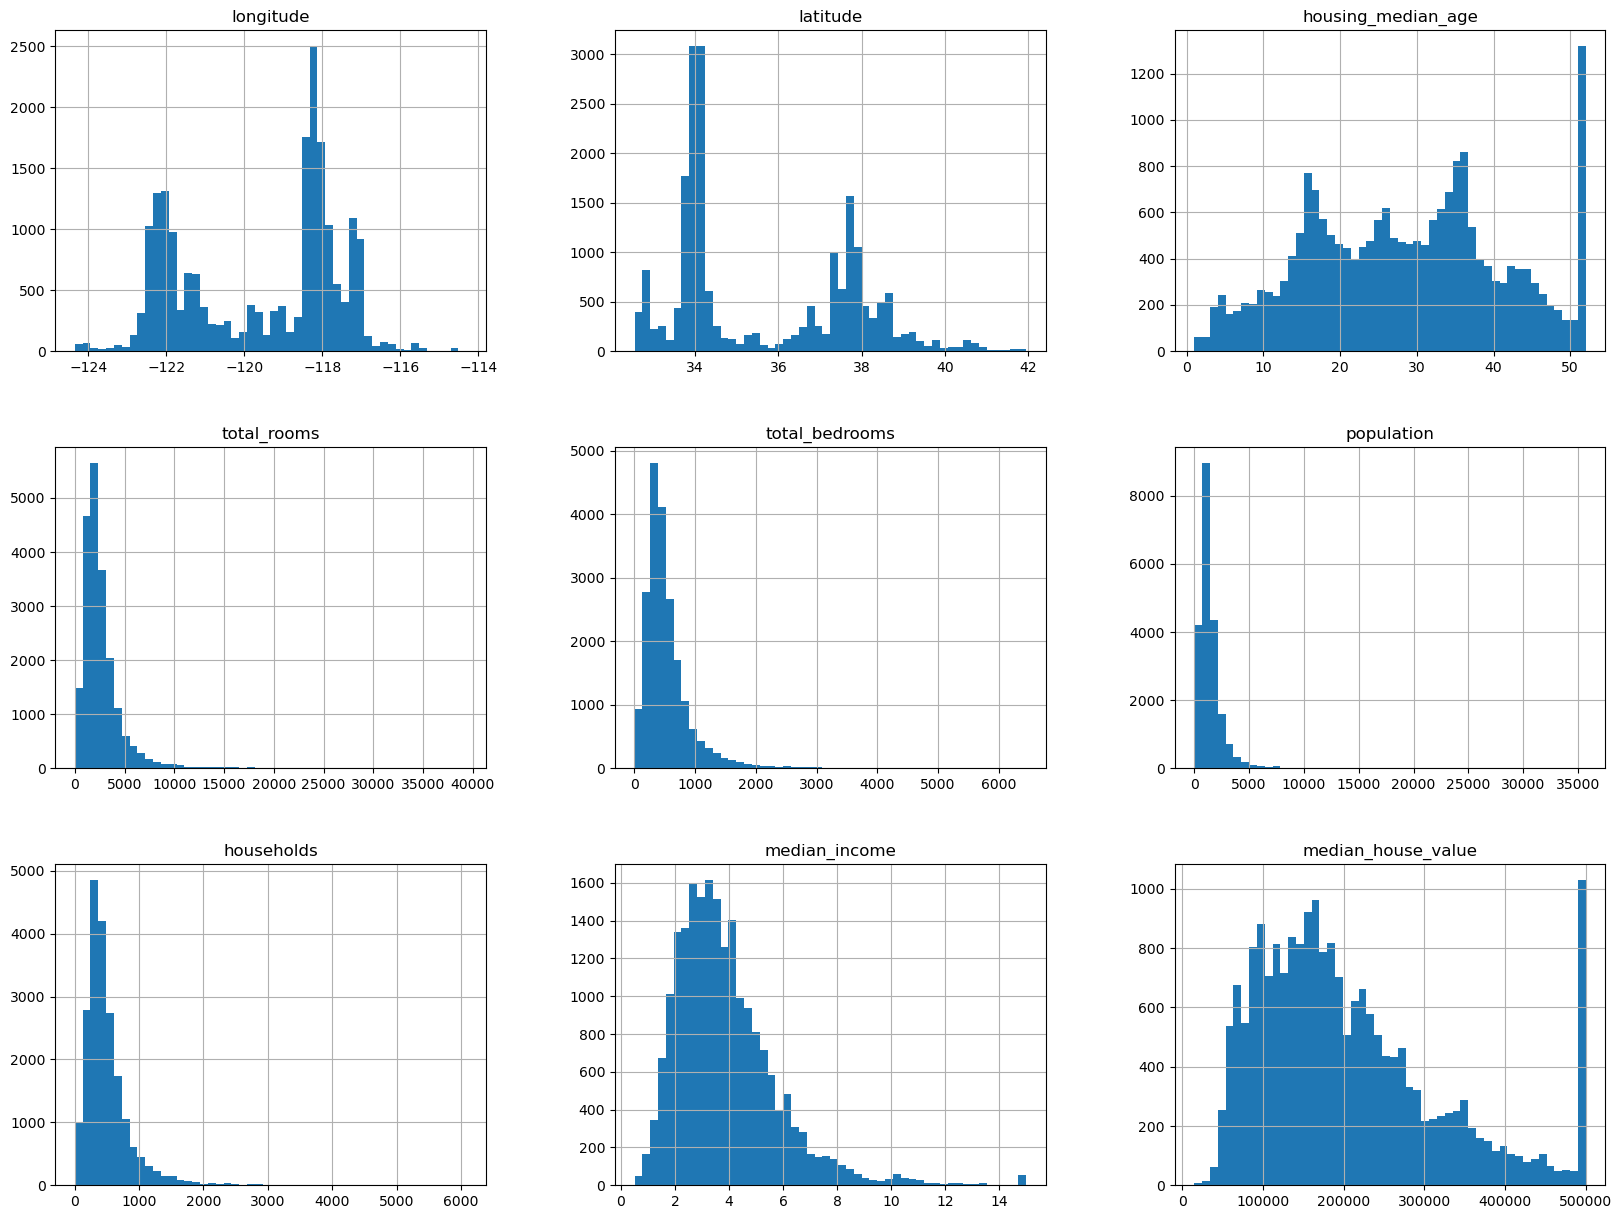

In [7]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

##### Observations
* The median_income attribute isn't expressed in US dollars. They roughly represent tens of thousands of dollars.

* The housing_median_age and the median_house_value were capped. This might pose a problem especially for the second attribute since it represent the output we want to predict. Our machine learning algorithms may learn that prices never go beyond that limit. In reality, we need to check with our client's team if this can be a problem or not. If they tell us that they need precise predictions even beyond 500,000 USD, then we have 2 options:

* Manually collect the actual labels of districts with a median_house_value >= 500,000USD.
* Remove those districts from the training/test sets, we don't want the model to learn never to go beyond 500,000USD.
* The attributes have very different scales, we will discuss feature scaling later.
* The attributes are tail-heavy & they often extend to the right than to the left. As a result, It will be difficult for many machine learning algorithms to find patterns within the data.

* We will learn how to transform the distribution from a tailed one to a bell-shaped normal/gaussian one.

### Create a Test Set

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
train_set.shape, test_set.shape

((16512, 10), (4128, 10))

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Create an "income category" column for stratification
housing['income_category'] = pd.cut(housing['median_income'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])


In [11]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [12]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_category'])

# Check distribution in original dataset
print("Income Category Distribution in Full Dataset:")
print(housing['income_category'].value_counts(normalize=True))

# Check distribution in train & test sets
print("\nIncome Category Distribution in Train Set:")
print(train_set['income_category'].value_counts(normalize=True))

print("\nIncome Category Distribution in Test Set:")
print(test_set['income_category'].value_counts(normalize=True))


Income Category Distribution in Full Dataset:
income_category
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: proportion, dtype: float64

Income Category Distribution in Train Set:
income_category
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: proportion, dtype: float64

Income Category Distribution in Test Set:
income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: proportion, dtype: float64


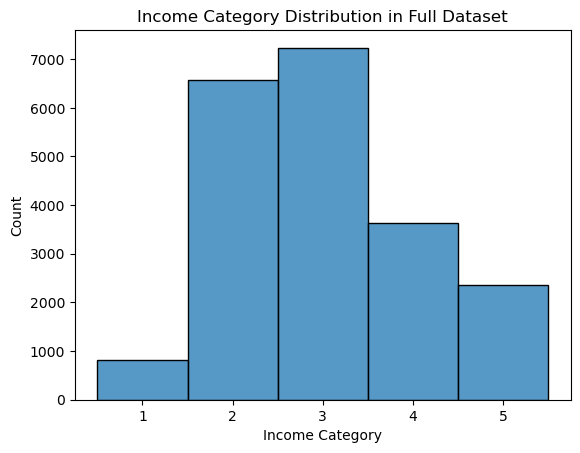

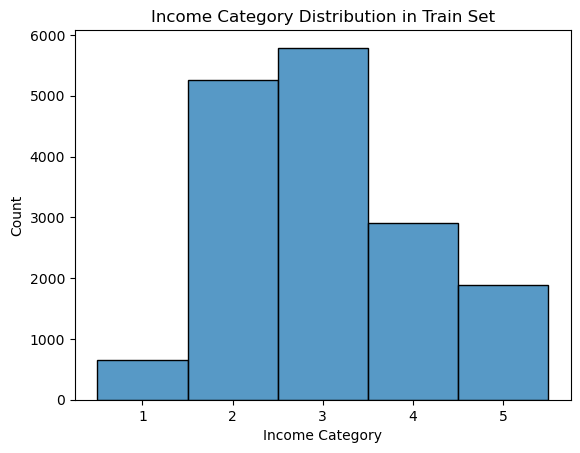

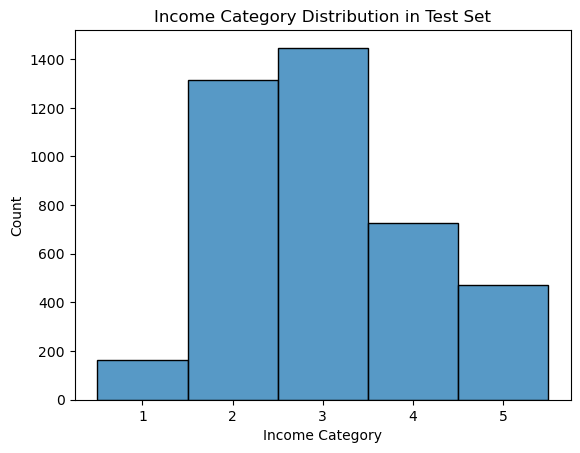

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot distributions
def plot_distribution(housing, title):
    sns.histplot(housing['income_category'], bins=5, kde=False)
    plt.title(title)
    plt.xlabel("Income Category")
    plt.ylabel("Count")
    plt.xticks(range(1, 6))  # Since income categories are labeled 1 to 5
    plt.show()

# Plot the full dataset
plot_distribution(housing, "Income Category Distribution in Full Dataset")

# Plot training set
plot_distribution(train_set, "Income Category Distribution in Train Set")

# Plot test set
plot_distribution(test_set, "Income Category Distribution in Test Set")


## EDA
we will perform EDA on train_set data

In [15]:
train_set.shape

(16512, 11)

In [16]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_category
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN,4
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN,3
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN,3
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN,2
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN,2
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN,4
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN,4


In [21]:
test_set.reset_index().to_feather(
    'C:\\Users\\well\\Machine Learning Projects\\practice project\\strat_test_set.f'
)

In [23]:
housing_train_set = train_set.copy(); housing_train_set.shape

(16512, 11)

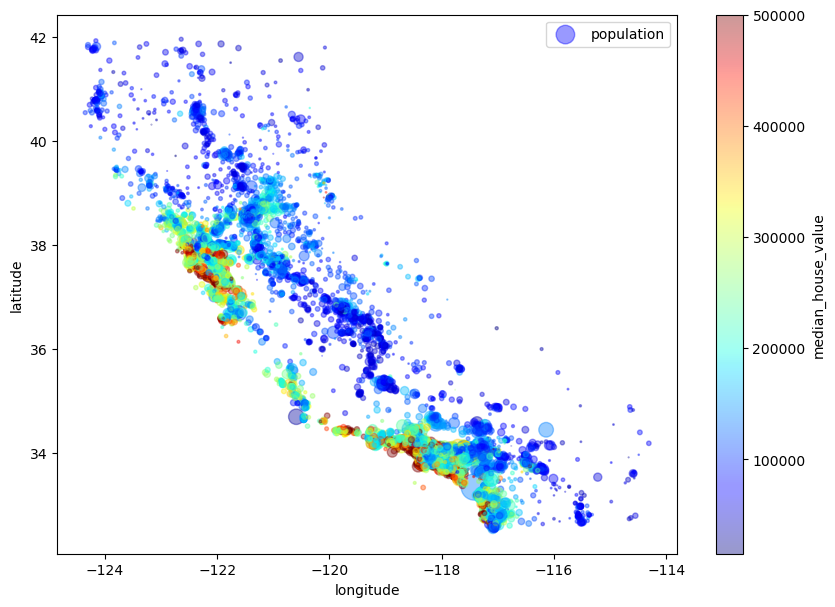

In [33]:
housing_train_set.plot(kind='scatter', x='longitude', y='latitude', alpha=.4, s=housing_train_set['population']/100., 
             label='population', figsize=(10, 7), c='median_house_value', cmap=plt.get_cmap(name='jet'), colorbar=True)
plt.legend()

#### Analysis of the Scatter Plot (Population vs. Price vs. Location)
Geographical Trends:

* Higher house prices (red/yellow points) are concentrated along the coastal regions.
* Inland areas, especially in the central and eastern parts of California, generally have lower house prices (blue/green points).

Population and Housing Prices:

* Larger bubbles (higher population) are mostly in urban areas like Los Angeles and the Bay Area, where house prices tend to be higher.
* Some inland areas have large populations but lower house prices, indicating that population density alone does not determine housing prices.

Urban vs. Rural Contrast:

* Coastal cities have high prices and high population density, indicating high demand.
* Less populated rural areas tend to have lower housing prices, likely due to lower demand and fewer job opportunities.

##### Key Insights:
House prices are strongly influenced by location, with coastal areas being the most expensive.
Higher population density correlates with higher prices, but it's not the sole factor—economic activity, job markets, and desirability play a role.
If the goal is predicting house prices, features like proximity to the coast, economic hubs, and population density could be important.

In [35]:
# Compute correlation between population and median house value
correlation = housing_train_set[["population", "median_house_value"]].corr()
correlation

,population,median_house_value
population,1.000000,-0.026882
median_house_value,-0.026882,1.000000


#### Analysis of Correlation Between Population and Median House Value
The correlation coefficient is -0.0269, which is very close to 0.
This indicates almost no linear relationship between population and house prices.
Higher population does not necessarily mean higher or lower house prices.

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_

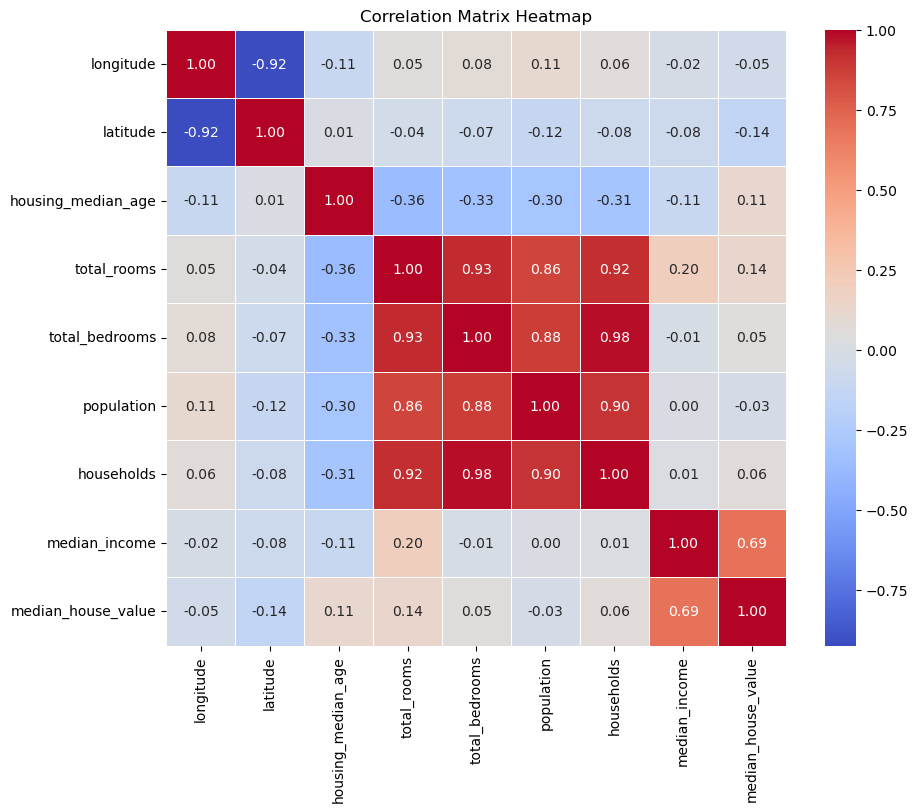

In [39]:
# Compute correlation matrix excluding the categorical column
correlation_matrix = housing_train_set.select_dtypes(include=[float, int]).corr()

# Display the matrix
print(correlation_matrix)

# Visualizing the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


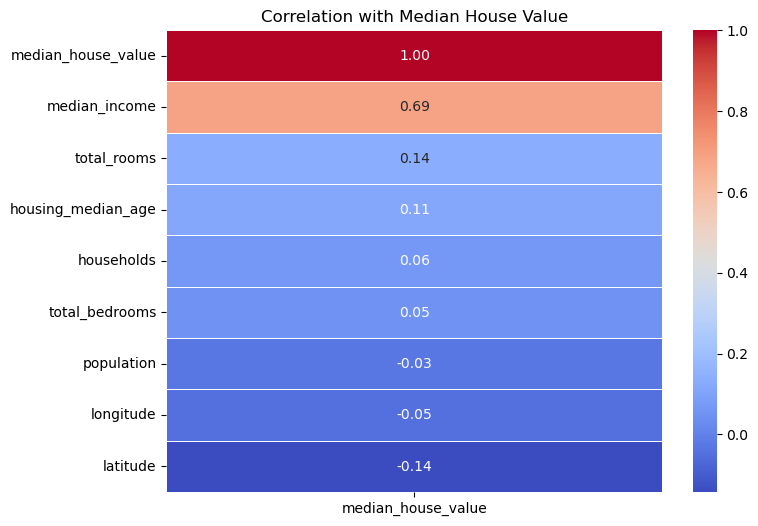

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation of numerical features with median_house_value
correlation_with_target = housing_train_set.select_dtypes(include=[float, int]).corr()["median_house_value"].sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_target.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation with Median House Value")
plt.show()
